# Kr83m First Analysis

Data : Nov 2016 

Pax version : 6.4.2

## Double Scatter TreeMaker

For this analysis, we need : 
- Main S1 (PE)= s1_a (32.2 keV)
- Second main S1 (PE)= s1_b (9.4 keV)
- Delay Time (ns)= s1_b_center_time-s1_a_center_time
- Number of PMTs contributing to main S1 = s1_b_n_contributing_channels
- Number of PMTs contributing to s1_b distinct from the PMTs that contributed to s1_a = ds_s1_b_n_distinct_channels

So, we use the double scattered treemaker which : 

- Search for a interaction (giving S1_0 and S2_0)
- Search for other interaction (giving S1_1 and S2_1)
- Order in times the scatters (giving S1_a for the 1st S1 and S1_b for the 2nd)
- Find the largest hits in each channel,  S1_a and S1_b and determine peaks and interactions information (Peak and Interaction Output)

Peak Output (for PEAK in [s1_a, s2_a, s1_b, s2_b, s1_2, s2_2])
- PEAK : The uncorrected area in pe of the peak
- PEAK_area_fraction_top : The fraction of uncorrected area in the peak seen by the top array
- PEAK_center_time : The center_time in ns of the peak

- PEAK_n_contributing_channels : The number of PMTs contributing to the peak
- PEAK_range_50p_area : The width of the peak (ns), duration of region that contains 50% of the area of the peak

Interaction Output (for INT in [int_a, int_b])
- INT_x : The x-position of this interaction (primary algorithm chosen by pax, currently TopPatternFit)
- INT_y : The y-position of this interaction
- INT_z : The z-position of this interaction
- INT_s1_area_correction : The multiplicative s1 area correction of this interaction
- INT_s2_area_correction : The multiplicative s2 area correction of this interaction
- INT_drift_time : The drift time in ns (pax units) of this interaction
- INT_s1_pattern_fit : The s1 pattern fit (-log liklihood) of this interaction

DoubleScatter Specific Output
- ds_s1_b_n_distinct_channels : number of PMTs contributing to s1_b distinct from the PMTs that contributed to s1_a
- ds_second_s2 : True if selected interactions have distinct s2s


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from multihist import Histdd

/project/lgrandi/anaconda3/envs/pax_v6.5.0/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/project/lgrandi/anaconda3/envs/pax_v6.5.0/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [3]:
matplotlib.rc('font', size=16)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # ... and big plots

In [4]:
from pax.configuration import load_configuration
pax_config = load_configuration('XENON1T')

In [5]:
n_channels = pax_config['DEFAULT']['n_channels']
pmts = pax_config['DEFAULT']['pmts']
tpc_height = pax_config['DEFAULT']['tpc_length']
tpc_radius = pax_config['DEFAULT']['tpc_radius']
gains = pax_config['DEFAULT']['gains']
busy_on_ch = pax_config['DEFAULT']['channels_in_detector']['busy_on'][0]

In [6]:
# Initialize hax
import hax

hax.__version__
hax.init(raw_data_access_mode='local',
         raw_data_local_path='/project/lgrandi/xenon1t/raw',
         minitree_paths = ['/home/masbou/scratch-midway/minitrees/pax_v6.5.0'])

In [7]:
dataset_test=[4580]
data= hax.minitrees.load(dataset_test , treemakers=['DoubleScatter'])

/project/lgrandi/anaconda3/envs/pax_v6.5.0/lib/python3.4/site-packages/pandas/computation/align.py:98: RuntimeWarning: divide by zero encountered in log10
  ordm = np.log10(abs(reindexer_size - term_axis_size))


In [283]:
dataset=[4580,4581,4582,4583,4584,4585,4587,4586,4588,4589,4590,4591,4594,
         4596,4597,4598,4599,4600,
         4601,4602,4603,
         4604,4605,4606,
         4607,4608,4609,
         4610,4611,4612,4613]
print(dataset)

[4580, 4581, 4582, 4583, 4584, 4585, 4587, 4586, 4588, 4589, 4590, 4591, 4594, 4596, 4597, 4598, 4599, 4600, 4601, 4602, 4603, 4604, 4605, 4606, 4607, 4608, 4609, 4610, 4611, 4612, 4613]


In [284]:
# dataset3=[4608+i for i in range(6)]
# print (dataset3)

In [285]:
# dataset2=[4594+i for i in range(15)]
# print (dataset2)

In [286]:
data= hax.minitrees.load(dataset, treemakers=['DoubleScatter'])

/project/lgrandi/anaconda3/envs/pax_v6.5.0/lib/python3.4/site-packages/pandas/computation/align.py:98: RuntimeWarning: divide by zero encountered in log10
  ordm = np.log10(abs(reindexer_size - term_axis_size))


In [287]:
print('Total number of events = ', len(data))

Total number of events =  2886628


In [288]:
df=data

In [289]:
#Definition of Delay Time
df['s1_dt_center_time'] = df['s1_b_center_time'] - df['s1_a_center_time']
#Corrected signal
df['cs1_a'] =df['s1_a'] * df['int_a_s1_area_correction']
df['cs1_b'] =df['s1_b'] * df['int_b_s1_area_correction']
df['cs2_a'] =df['s2_a'] * df['int_a_s2_area_correction']


# Shape of the data with no cut

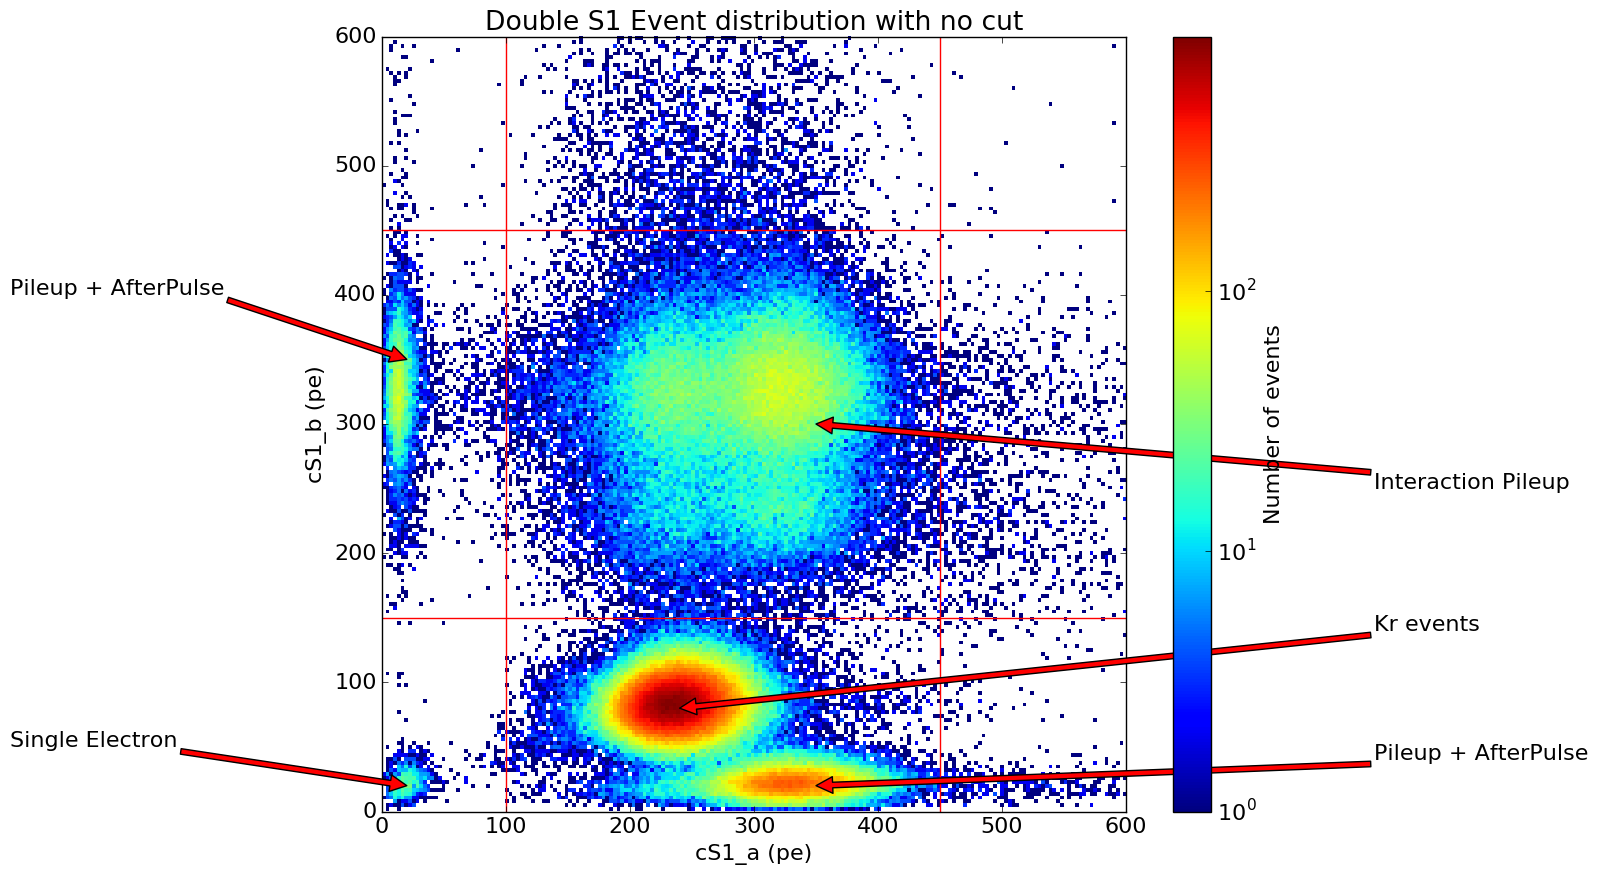

In [290]:
plt.plot()
plt.hist2d(df['cs1_a'],
            df['cs1_b'], 
            range=[[0,600],[0,600]],
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('cS1_a (pe)')
plt.ylabel('cS1_b (pe)')
plt.title('Double S1 Event distribution with no cut')
plt.annotate('Pileup + AfterPulse', xy=(350, 20) , xytext=(800, 40),arrowprops=dict(facecolor='red', shrink=1))
plt.annotate('Pileup + AfterPulse', xy=(20, 350) , xytext=(-300, 400),arrowprops=dict(facecolor='red', shrink=1))

plt.annotate('Kr events ', xy=(240, 80) , xytext=(800, 140),arrowprops=dict(facecolor='red', shrink=1))
plt.annotate('Single Electron', xy=(20, 20) , xytext=(-300, 50),arrowprops=dict(facecolor='red', shrink=1))
plt.annotate('Interaction Pileup', xy=(350, 300) , xytext=(800, 250),arrowprops=dict(facecolor='red', shrink=1))
plt.axhline(150, color='red')
plt.axhline(450, color = 'red')
plt.axvline(450, color ='red')
plt.axvline(100, color ='red')
plt.show()

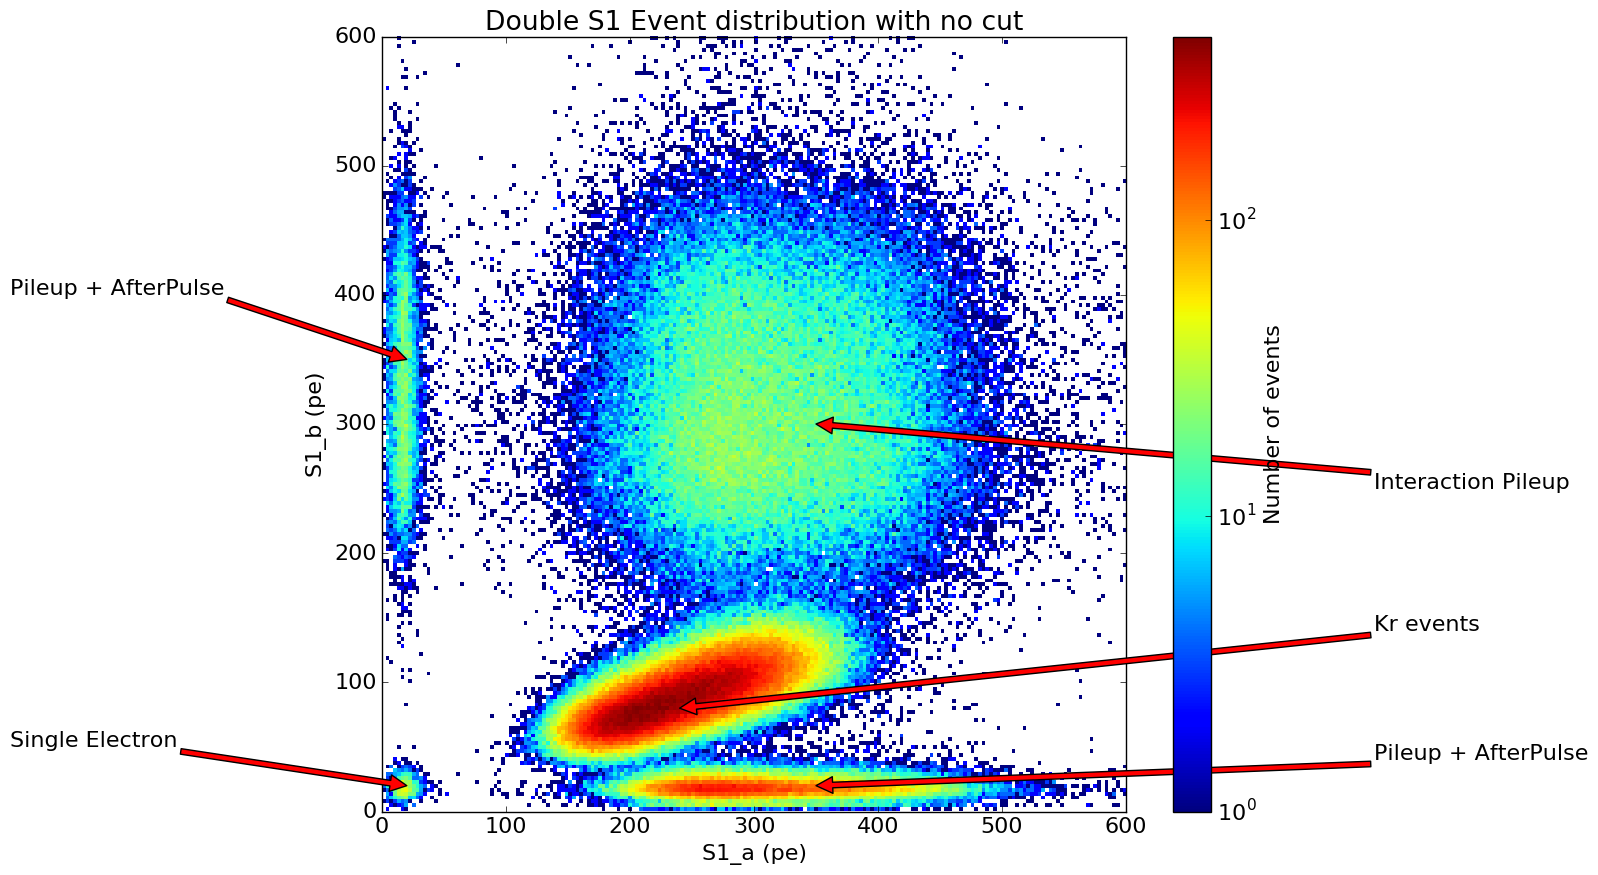

In [291]:
plt.plot()
plt.hist2d(df['s1_a'],
            df['s1_b'], 
            range=[[0,600],[0,600]],
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('S1_a (pe)')
plt.ylabel('S1_b (pe)')
plt.title('Double S1 Event distribution with no cut')
plt.annotate('Pileup + AfterPulse', xy=(350, 20) , xytext=(800, 40),arrowprops=dict(facecolor='red', shrink=1))
plt.annotate('Pileup + AfterPulse', xy=(20, 350) , xytext=(-300, 400),arrowprops=dict(facecolor='red', shrink=1))

plt.annotate('Kr events ', xy=(240, 80) , xytext=(800, 140),arrowprops=dict(facecolor='red', shrink=1))
plt.annotate('Single Electron', xy=(20, 20) , xytext=(-300, 50),arrowprops=dict(facecolor='red', shrink=1))
plt.annotate('Interaction Pileup', xy=(350, 300) , xytext=(800, 250),arrowprops=dict(facecolor='red', shrink=1))

plt.show()

In [292]:
print('Total number of event :' ,len(df))

Total number of event : 2886628


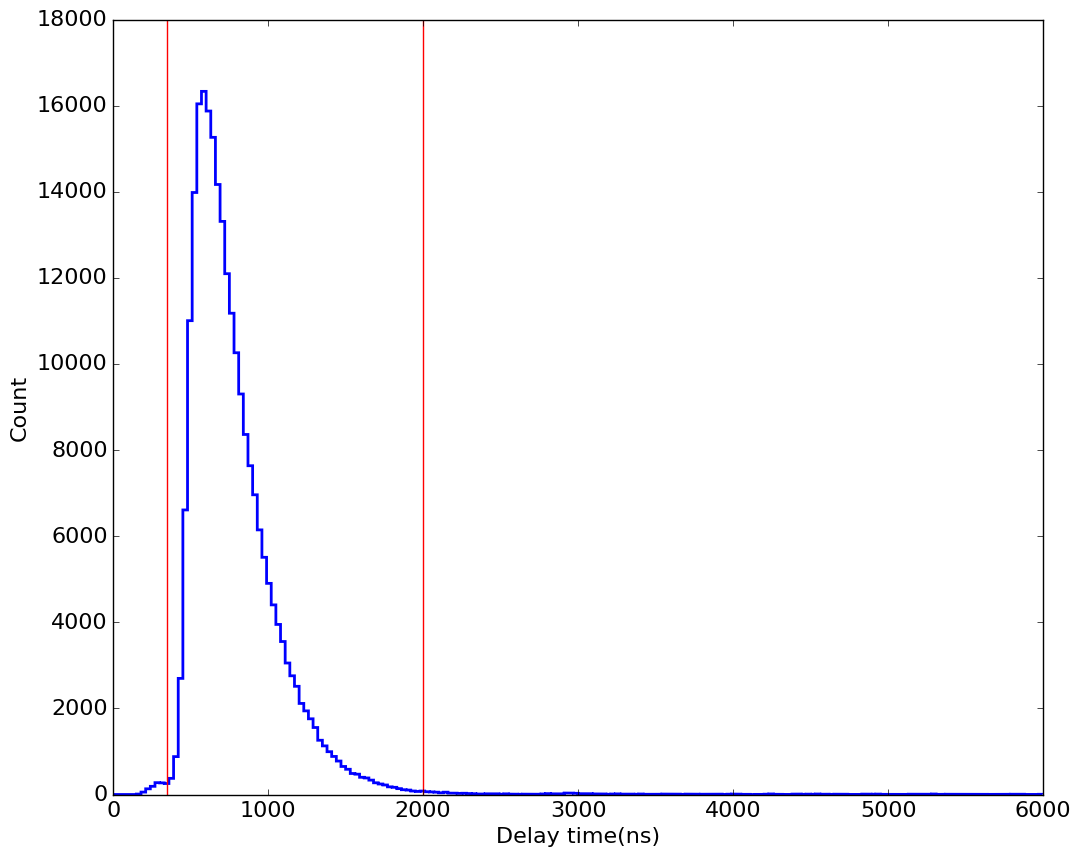

In [293]:
plt.hist(df['s1_dt_center_time'], range=(0,6000), bins =200, histtype='step',lw=2)
plt.xlabel('Delay time(ns)')
plt.ylabel('Count')

plt.axvline(350,color='red')
plt.axvline(2000,color='red')
plt.show()

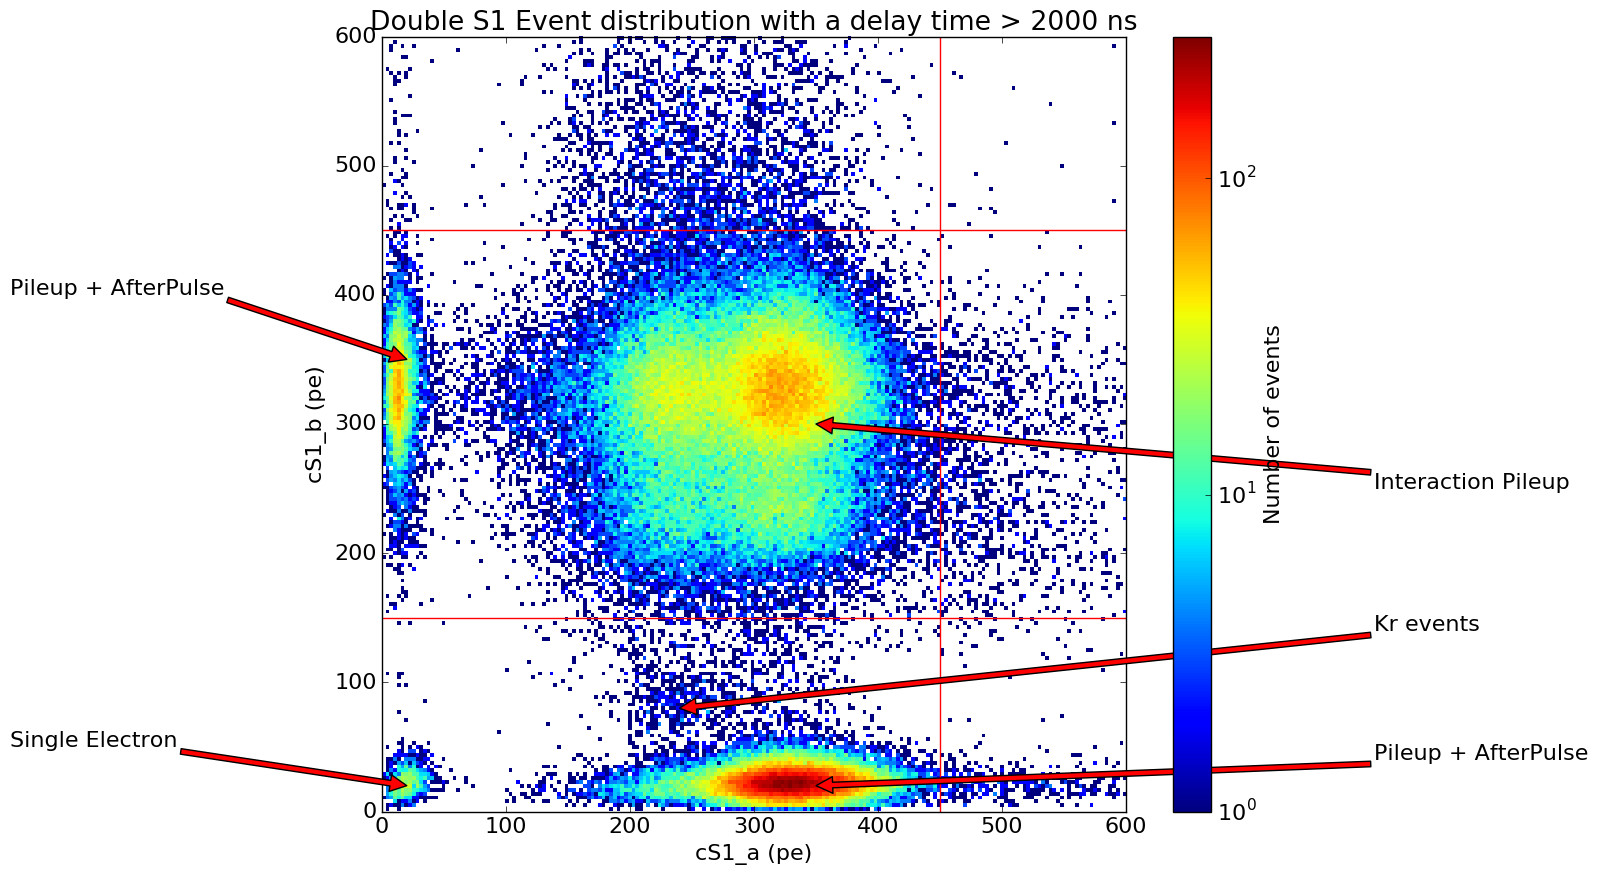

In [294]:
dt_test=df[df['s1_dt_center_time']>2000]
plt.plot()
plt.hist2d(dt_test['cs1_a'],
            dt_test['cs1_b'], 
            range=[[0,600],[0,600]],
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('cS1_a (pe)')
plt.ylabel('cS1_b (pe)')
plt.title('Double S1 Event distribution with a delay time > 2000 ns')
plt.annotate('Pileup + AfterPulse', xy=(350, 20) , xytext=(800, 40),arrowprops=dict(facecolor='red', shrink=1))
plt.annotate('Kr events ', xy=(240, 80) , xytext=(800, 140),arrowprops=dict(facecolor='red', shrink=1))
plt.annotate('Single Electron', xy=(20, 20) , xytext=(-300, 50),arrowprops=dict(facecolor='red', shrink=1))
plt.annotate('Interaction Pileup  ', xy=(350, 300) , xytext=(800, 250),arrowprops=dict(facecolor='red', shrink=1))
plt.annotate('Pileup + AfterPulse', xy=(20, 350) , xytext=(-300, 400),arrowprops=dict(facecolor='red', shrink=1))

plt.axhline(150, color='red')
plt.axhline(450, color = 'red')
plt.axvline(450, color ='red')
plt.show()

# Cut apply

Delay Time between the two signals : [350 - 2000] ns 

Number of PMTs contributing to second S1 distinct from the PMTs that contributed to the first S1 > 3

Fiducial Volume (0< r$^2$ <1000 cm$^2$ and -80< z <-20 cm)

In [295]:
#Selectin on delay time
df_dt_cut = df[(df['s1_dt_center_time']>350) & (df['s1_dt_center_time']<2000)]
print (len(df_dt_cut))

246575


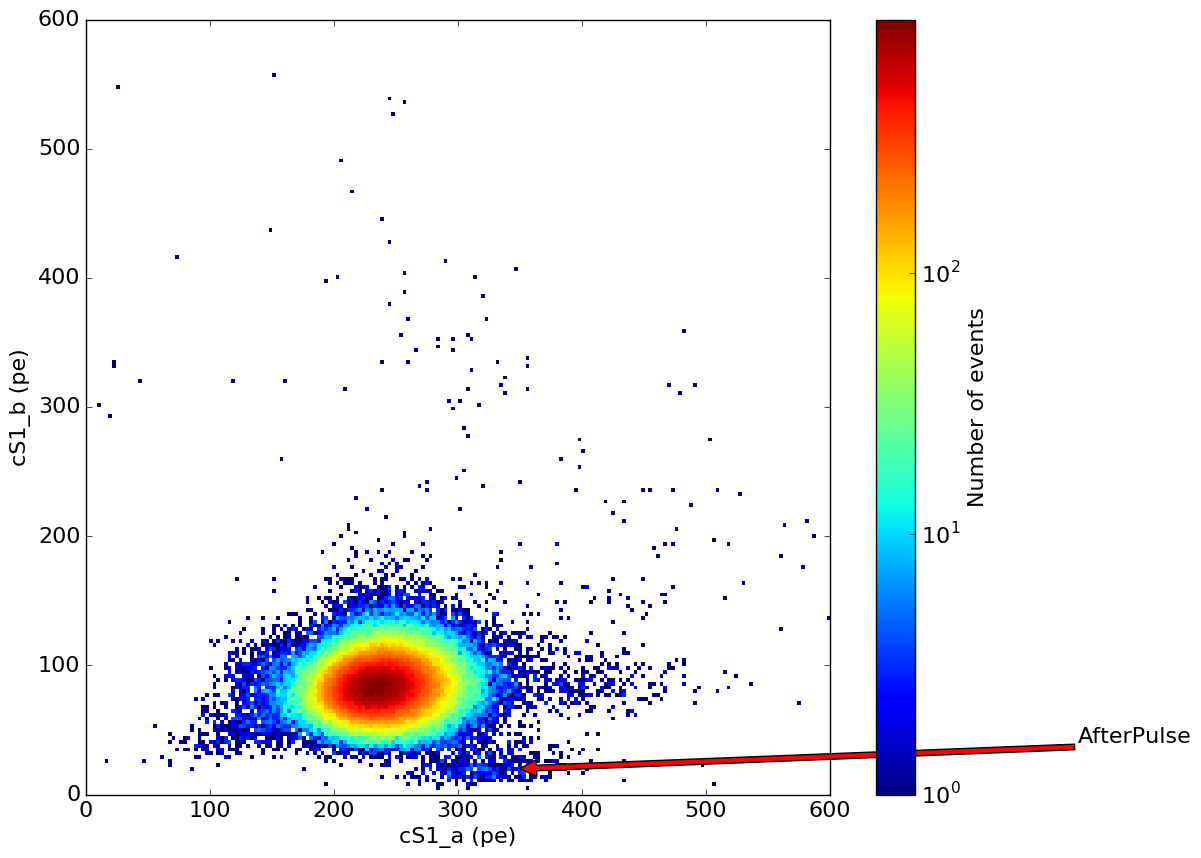

In [296]:
plt.plot()
plt.hist2d(df_dt_cut['cs1_a'],
            df_dt_cut['cs1_b'], 
            range=[[0,600],[0,600]],
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('cS1_a (pe)')
plt.ylabel('cS1_b (pe)')
#plt.title('Cut on delay time and on contributing channels')
plt.annotate('AfterPulse', xy=(350, 20) , xytext=(800, 40),arrowprops=dict(facecolor='red', shrink=1))
plt.show()

In [297]:
#Selection on contributing channels
df_ch_cut=df_dt_cut[df_dt_cut['ds_s1_b_n_distinct_channels']>3]
print(len(df_ch_cut))

245799


In [298]:
df1=df_ch_cut

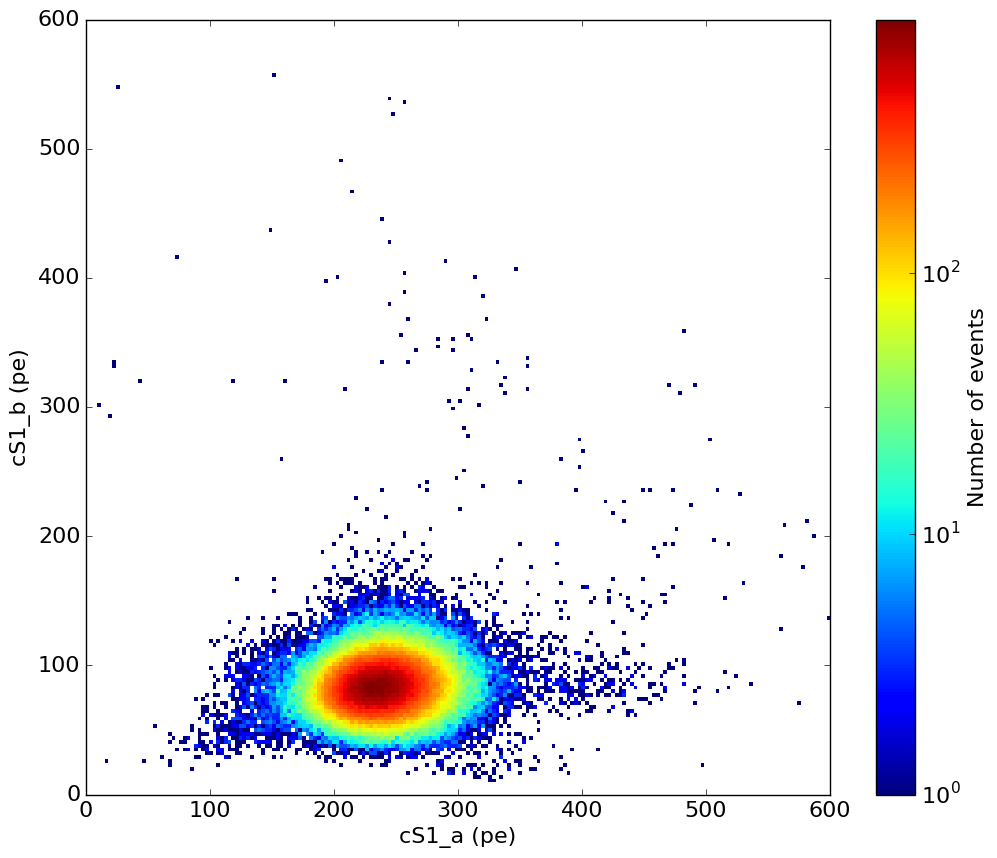

In [299]:
plt.plot()
plt.hist2d(df_ch_cut['cs1_a'],
            df_ch_cut['cs1_b'], 
            range=[[0,600],[0,600]],
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('cS1_a (pe)')
plt.ylabel('cS1_b (pe)')
#plt.title('Cut on delay time and on contributing channels')
plt.show()

2886628


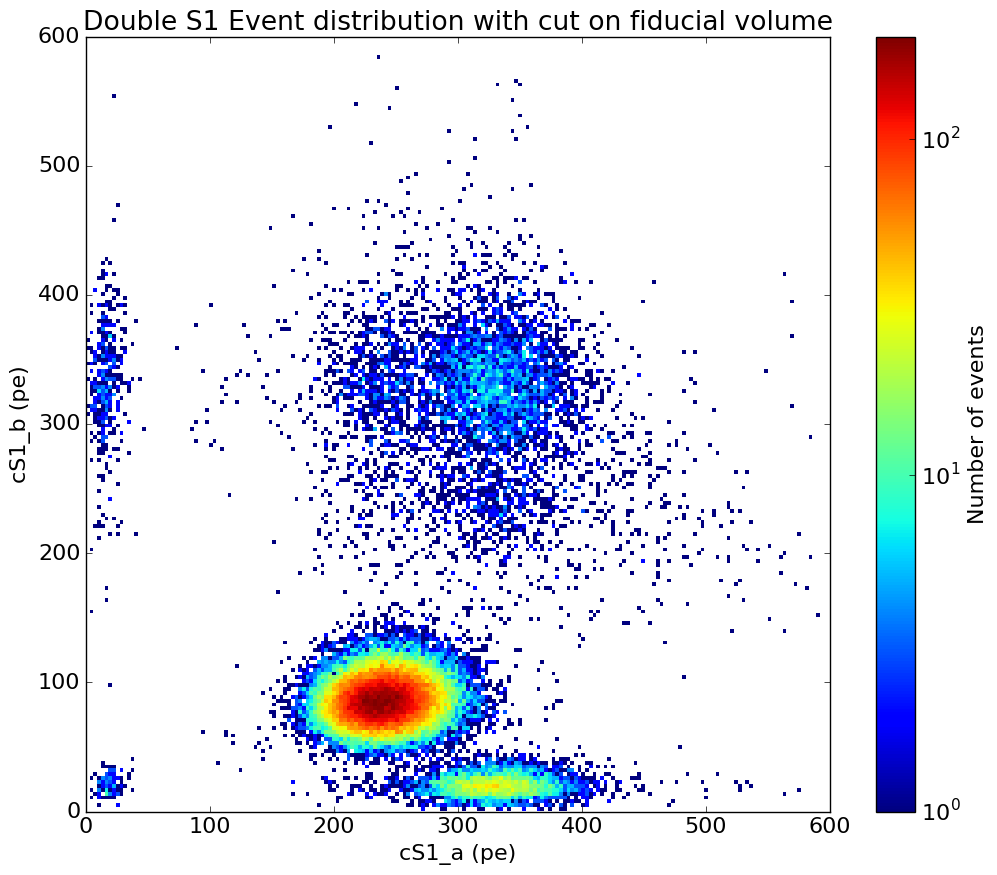

In [300]:
#Cut on the fiducial volume
df_fv=df[(df['int_a_z'] <= -20) & (df['int_a_z'] >= -80)
             & (df['int_a_x']**2 + df['int_a_y']**2 <= 1000)
             & (df['int_b_z'] <= -20) & (df['int_b_z'] >= -80)
             & (df['int_b_x']**2 + df['int_b_y']**2 <= 1000 )]
print(len(df))
plt.plot()
plt.hist2d(df_fv['cs1_a'],
            df_fv['cs1_b'], 
            range=[[0,600],[0,600]],
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('cS1_a (pe)')
plt.ylabel('cS1_b (pe)')

plt.title('Double S1 Event distribution with cut on fiducial volume')
plt.show()

In [301]:
#Cut on the fiducial volume
df_fv_cut=df_ch_cut[(df_ch_cut['int_a_z'] <= -20) & (df_ch_cut['int_a_z'] >= -80)
             & (df_ch_cut['int_a_x']**2 + df_ch_cut['int_a_y']**2 <= 1000)
             & (df_ch_cut['int_b_z'] <= -20) & (df_ch_cut['int_b_z'] >= -80)
             & (df_ch_cut['int_b_x']**2 + df_ch_cut['int_b_y']**2 <= 1000 )]
print(len(df_fv_cut))
df2=df_fv_cut

49234


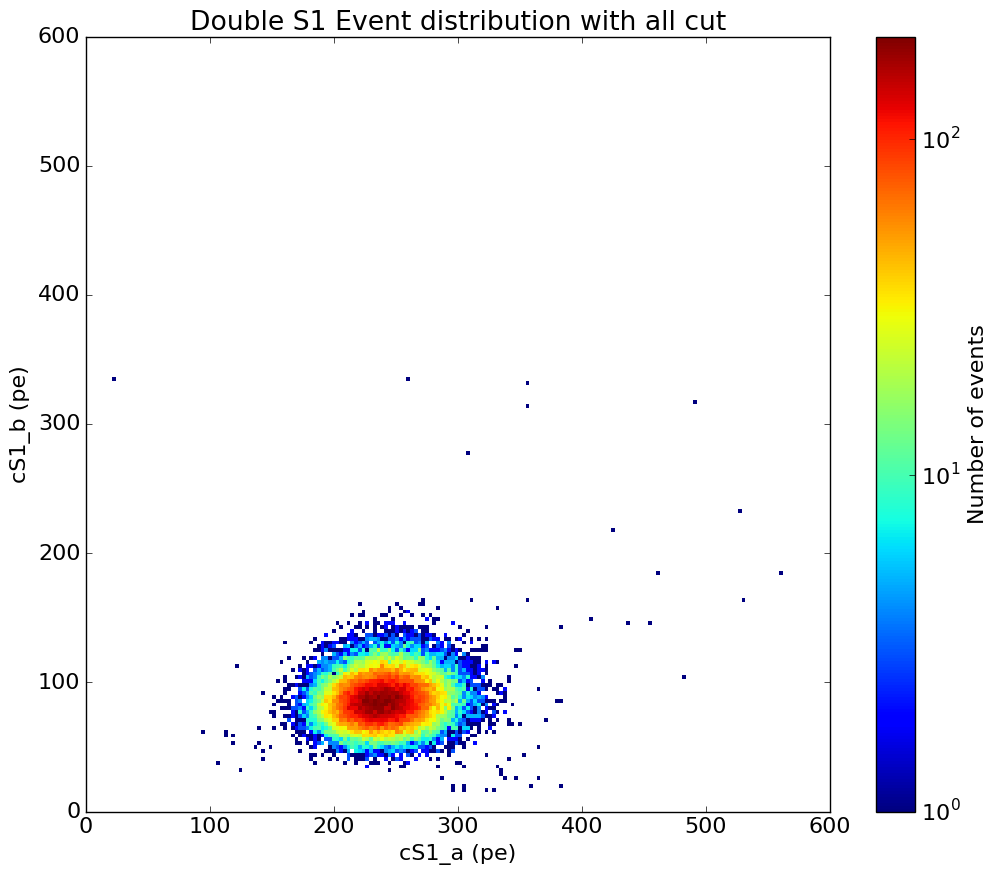

In [302]:
plt.plot()
plt.hist2d(df_fv_cut['cs1_a'],
            df_fv_cut['cs1_b'], 
            range=[[0,600],[0,600]],
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('cS1_a (pe)')
plt.ylabel('cS1_b (pe)')
plt.title('Double S1 Event distribution with all cut')
plt.show()

In [303]:
print('The total number of events left after all the cut applied is ', len(df2))
print('Fraction of remaning events ', len(df2)/len(data)*100, '%')

The total number of events left after all the cut applied is  49234
Fraction of remaning events  1.7055886660837487 %


# S1s as a function of delay time

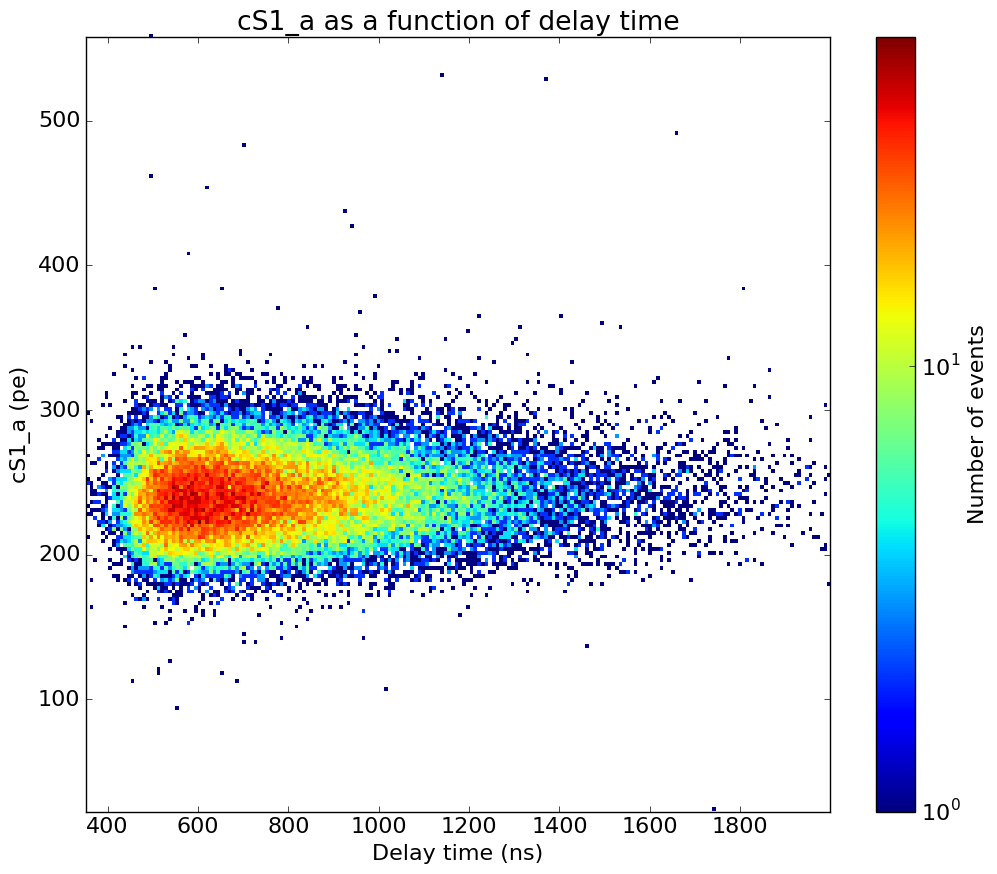

In [304]:
plt.plot()
plt.hist2d(df2['s1_dt_center_time'],
            df2['cs1_a'],
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('Delay time (ns)')
plt.ylabel('cS1_a (pe)')
plt.title ('cS1_a as a function of delay time')
plt.show()


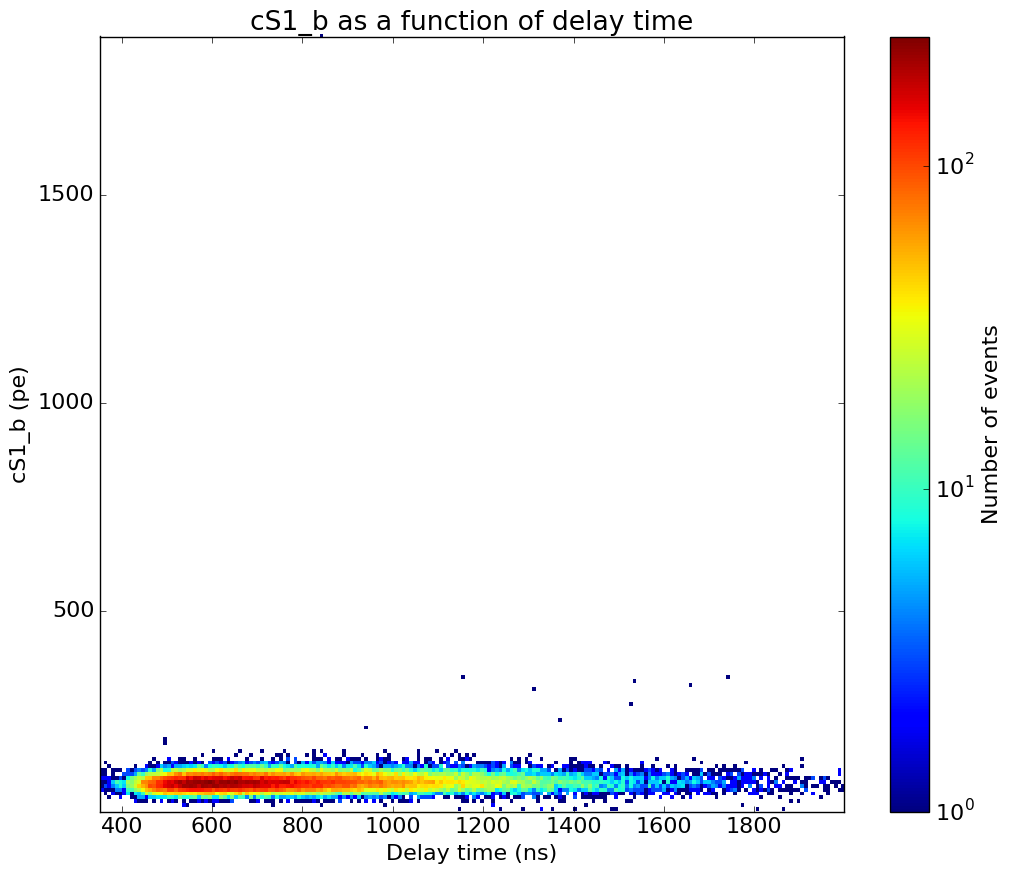

In [305]:
plt.plot(122)
plt.hist2d(df2['s1_dt_center_time'],
            df2['cs1_b'], 
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('Delay time (ns)')
plt.ylabel('cS1_b (pe)')
plt.title('cS1_b as a function of delay time')
plt.show()


One very hight point ? A hight delay time ? 
Let's cut it for the moment

In [306]:
df2=df2[df2['cs1_b']<500]
print(len(df2))

49233


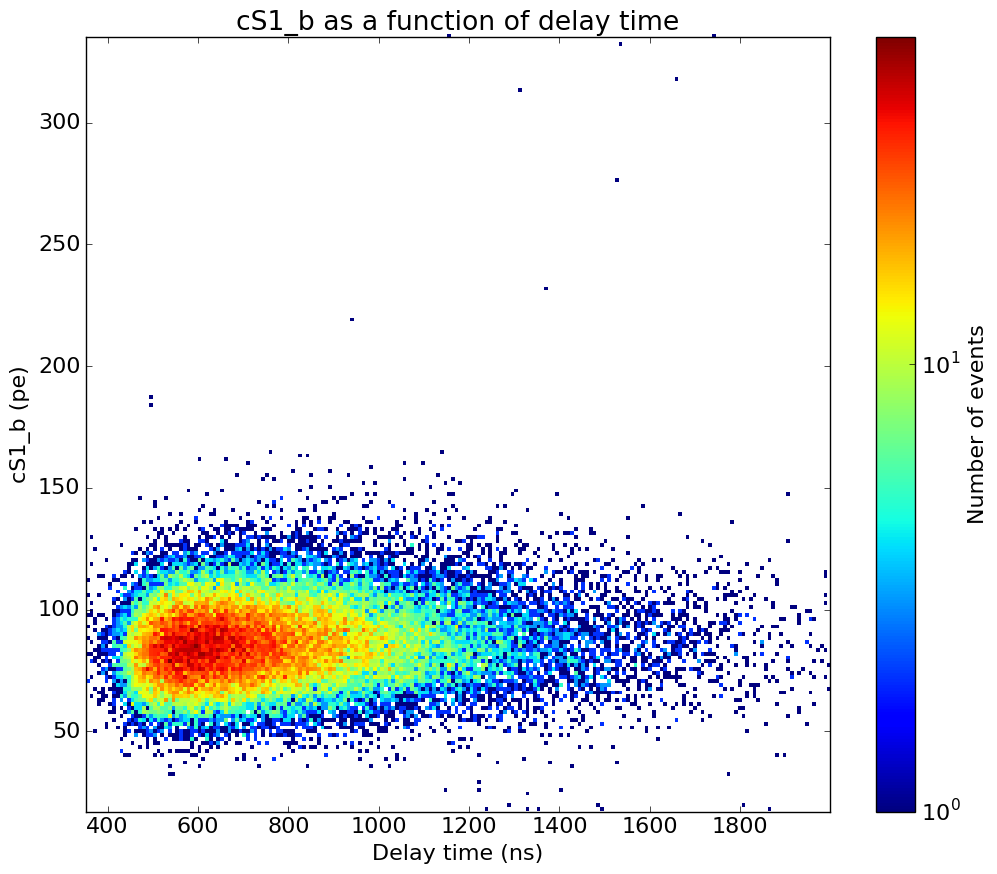

In [307]:
plt.plot(122)
plt.hist2d(df2['s1_dt_center_time'],
            df2['cs1_b'], 
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('Delay time (ns)')
plt.ylabel('cS1_b (pe)')
plt.title('cS1_b as a function of delay time')
plt.show()

# Light Yield and Electron Lifetime
error bar = standard deviation / sqrt(number of events)

## Corrected S1 signals

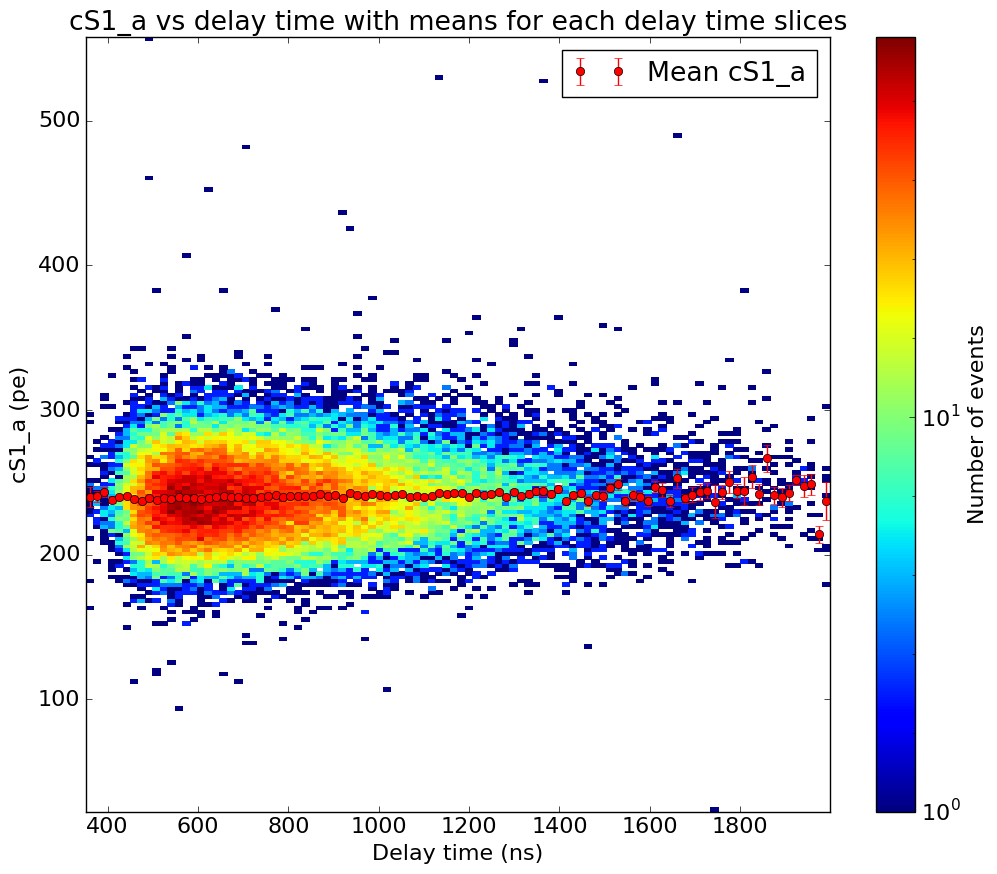

In [308]:
## Error bar : standard deviation / sqrt(N)

delay_time=df2['s1_dt_center_time']
cs1_a=df2['cs1_a']

h = Histdd(delay_time, cs1_a, bins=(100,200), #Mean calculate on each bins
           axis_names=['delay_time', 'cs1_a'])

t = h.bin_centers('delay_time') # t = delay time (bin) 
ms1_a = h.average('cs1_a').histogram # ms1_a = mean value of s1_a
std_error_a = (h.std(axis='cs1_a') / np.sqrt(h.sum('cs1_a'))).histogram # std : Compute the standard deviation along the specified axis

h.plot(log_scale=True, cblabel='Number of events')
plt.errorbar(t, ms1_a, yerr=std_error_a,
             marker='o', linestyle='', color='red',
             label='Mean cS1_a')
plt.xlabel('Delay time (ns)')
plt.ylabel('cS1_a (pe)')


plt.legend()
plt.title("cS1_a vs delay time with means for each delay time slices")
plt.show()

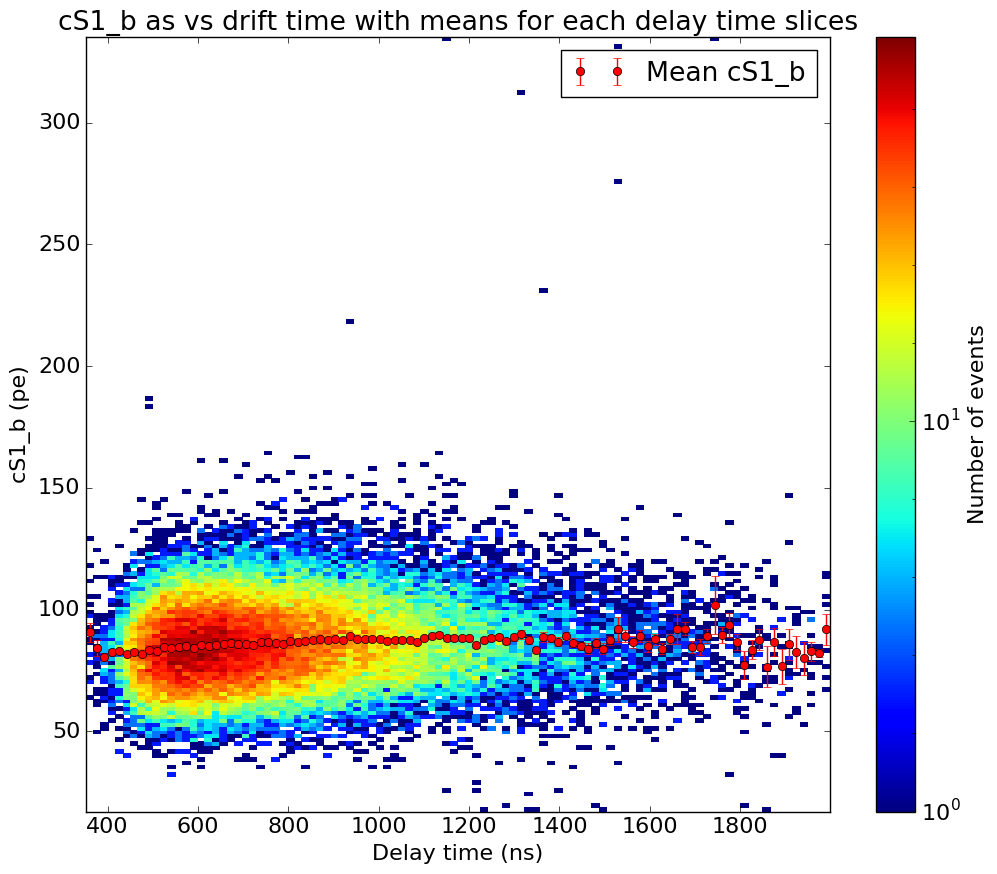

In [309]:
# Error bar : standard deviation / sqrt(N)

delay_time=df2['s1_dt_center_time']
cs1_b=df2['cs1_b']

h = Histdd(delay_time, cs1_b, bins=(100, 200), #Mean calculate on each bins
           axis_names=['delay_time', 'cs1_b'])

t = h.bin_centers('delay_time') # t = delay time (bin) 
ms1_b = h.average('cs1_b').histogram # ms1 = mean value of s1
std_error_b = (h.std(axis='cs1_b') / np.sqrt(h.sum('cs1_b'))).histogram # std : Compute the standard deviation along the specified axis

h.plot(log_scale=True, cblabel='Number of events')
plt.errorbar(t, ms1_b, yerr=std_error_b,
             marker='o', linestyle='', color='red',
             label='Mean cS1_b')
plt.xlabel('Delay time (ns)')
plt.ylabel('cS1_b (pe)')

plt.legend()
plt.title("cS1_b as vs drift time with means for each delay time slices")
plt.show()


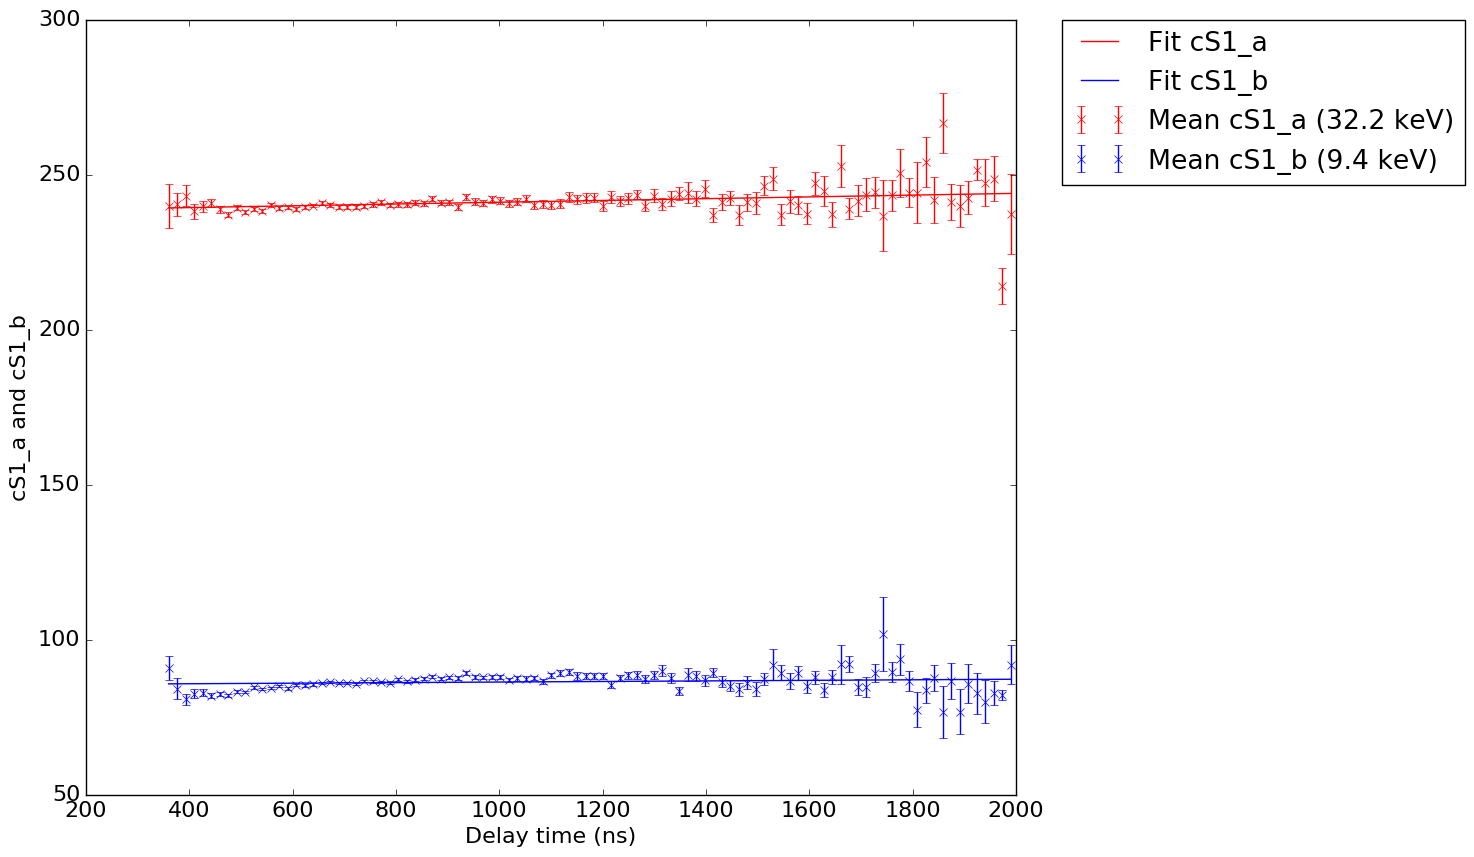

In [310]:
from scipy.optimize import curve_fit

def poly(x,slope, intercept):
    return x*slope+intercept

t = h.bin_centers('delay_time') # t = delay time (bin) 
popt_a, pcov_a = curve_fit(poly, t, ms1_a)
popt_b, pcov_b = curve_fit(poly, t, ms1_b)

# fit_a = np.polyfit(t, ms1_a, deg=1)
# fit_b = np.polyfit(t, ms1_b, deg=1)

plt.plot()
plt.errorbar(t, ms1_a, yerr=std_error_a,
             marker='x', linestyle='', color='red',
             label='Mean cS1_a (32.2 keV)')
plt.plot(t, popt_a[0] * t + popt_a[1], color='red', label="Fit cS1_a ")
plt.errorbar(t, ms1_b, yerr=std_error_b,
             marker='x', linestyle='', color='blue',
             label='Mean cS1_b (9.4 keV)')
plt.plot(t, popt_b[0] *t + popt_b[1], color='blue', label="Fit cS1_b ")
plt.xlabel('Delay time (ns)')
plt.ylabel('cS1_a and cS1_b')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [311]:
from scipy.stats import chisquare
print(chisquare(ms1_a, f_exp=popt_a[0] *t + popt_a[1], ddof=len(ms1_a)-2))
print(chisquare(ms1_b, f_exp=popt_b[0] *t + popt_b[1], ddof=len(ms1_b)-2))

Power_divergenceResult(statistic=9.1875060025050104, pvalue=0.0024367268179560503)
Power_divergenceResult(statistic=13.107669761791128, pvalue=0.00029408926649140678)


## Light Yield

In order to improve the light yield resolution, we fit the light yield between 600 and 1 500

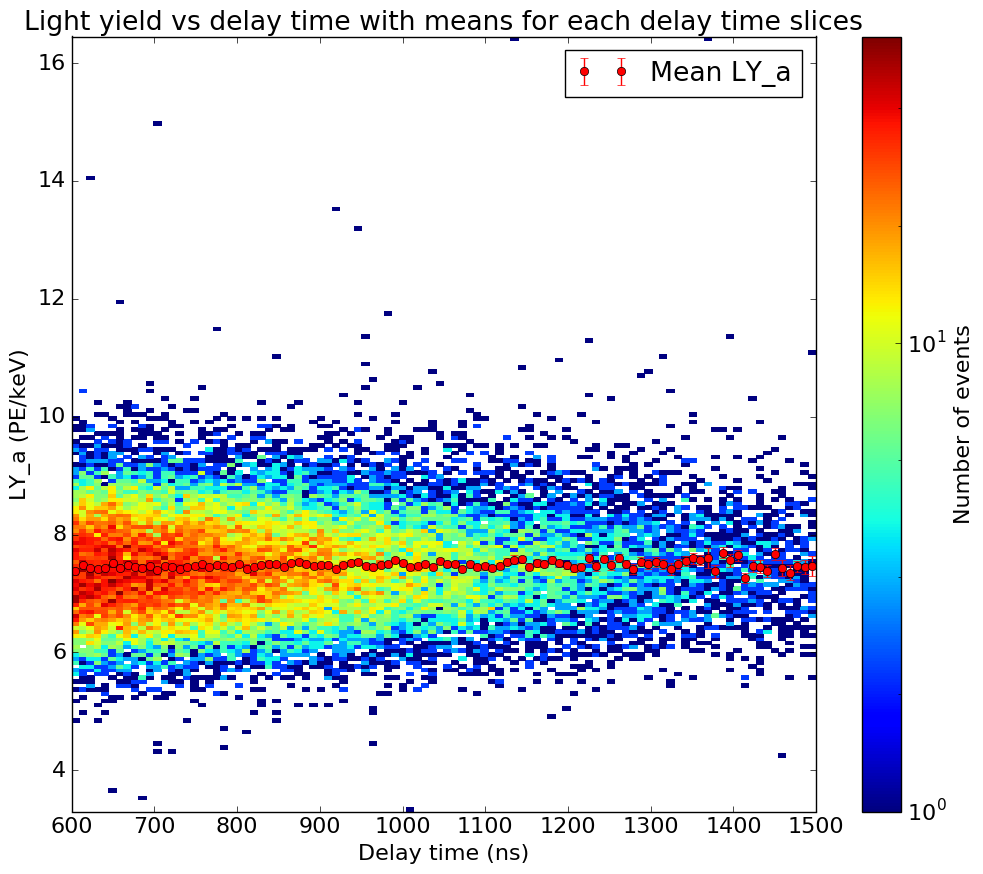

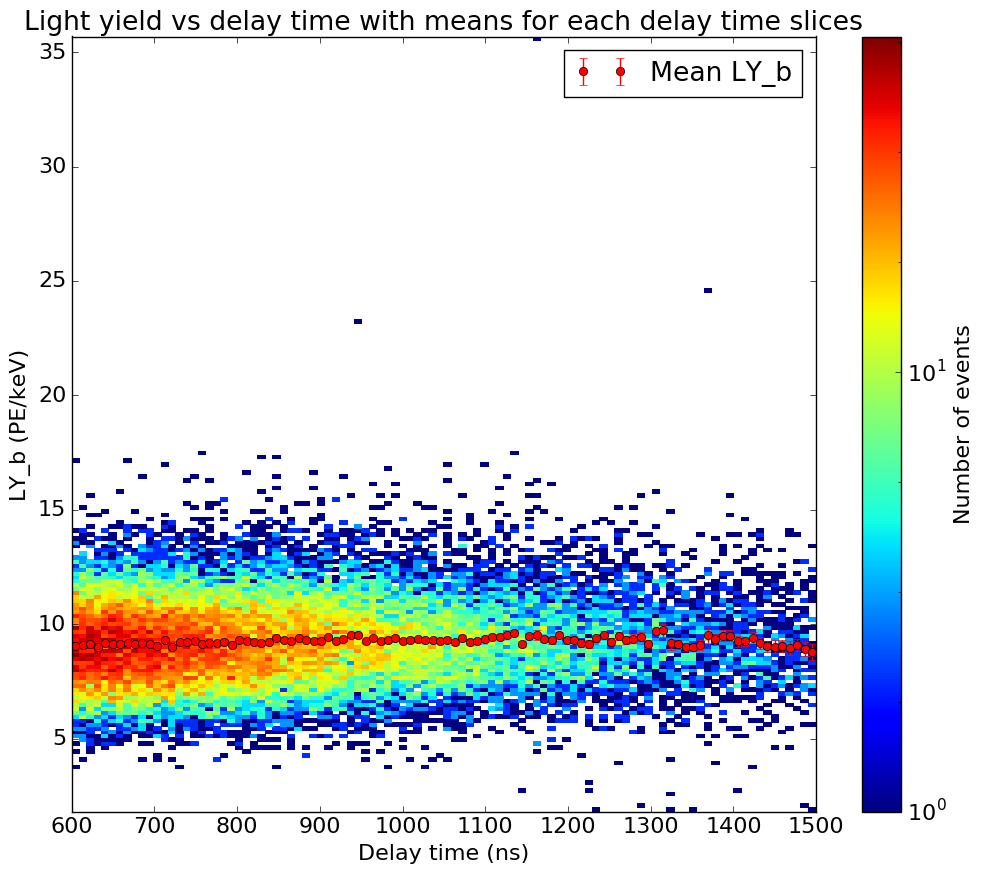

In [312]:
# # Error bar : standard deviation / sqrt(N)
df_fit=df2[(df2['s1_dt_center_time']>600) & (df2['s1_dt_center_time']<1500)]

delay_time=df_fit['s1_dt_center_time']
LY_a=df_fit['cs1_a']/32.2

h = Histdd(delay_time, LY_a, bins=(100,200), #Mean calculate on each bins
           axis_names=['delay_time', 'LY_a'])

t = h.bin_centers('delay_time') # t = delay time (bin) 
mLY_a = h.average('LY_a').histogram # ms1_a = mean value of s1_a
std_error_lya = (h.std(axis='LY_a') / np.sqrt(h.sum('LY_a'))).histogram # std : Compute the standard deviation along the specified axis

h.plot(log_scale=True, cblabel='Number of events')
plt.errorbar(t, mLY_a, yerr=std_error_lya,
             marker='o', linestyle='', color='red',
             label='Mean LY_a')
plt.xlabel('Delay time (ns)')
plt.ylabel('LY_a (PE/keV)')


plt.legend()
plt.title("Light yield vs delay time with means for each delay time slices")
plt.show()

LY_b=df_fit['cs1_b']/9.4

hb = Histdd(delay_time, LY_b, bins=(100,200), #Mean calculate on each bins
           axis_names=['delay_time', 'LY_b'])

t = hb.bin_centers('delay_time') # t = delay time (bin) 
mLY_b = hb.average('LY_b').histogram # ms1_a = mean value of s1_a
std_error_lyb = (hb.std(axis='LY_b') / np.sqrt(hb.sum('LY_b'))).histogram # std : Compute the standard deviation along the specified axis

hb.plot(log_scale=True, cblabel='Number of events')
plt.errorbar(t, mLY_b, yerr=std_error_lyb,
             marker='o', linestyle='', color='red',
             label='Mean LY_b')
plt.xlabel('Delay time (ns)')
plt.ylabel('LY_b (PE/keV)')


plt.legend()
plt.title("Light yield vs delay time with means for each delay time slices")
plt.show()

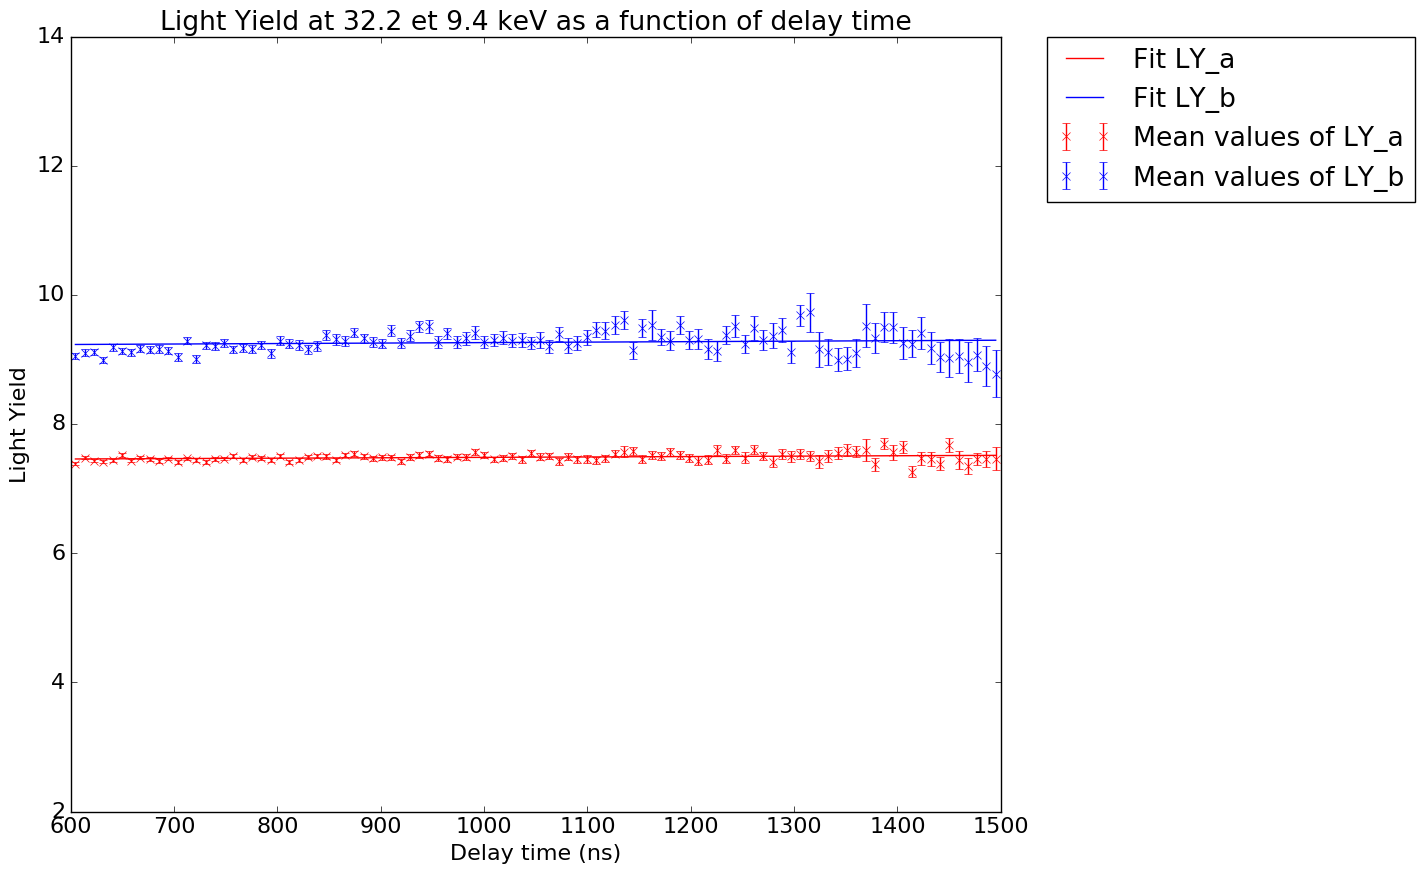

In [313]:
# Initial Guess
p0_a= (-3.5e-06,7.3)
p0_b= (3e-05,9)
popt_LYa, pcov_LYa = curve_fit(poly, t, mLY_a, p0_a)
popt_LYb, pcov_LYb = curve_fit(poly, t, mLY_b, p0_b)


plt.plot()
plt.errorbar(t, mLY_a, yerr=std_error_lya,
             marker='x', linestyle='', color='red',
             label='Mean values of LY_a')
plt.plot(t, popt_LYa[0] * t + popt_LYa[1], color='red', label="Fit LY_a")


plt.errorbar(t, mLY_b, yerr=std_error_lyb,
             marker='x', linestyle='', color='blue',
             label='Mean values of LY_b')
plt.plot(t, popt_LYb[0] *t + popt_LYb[1], color='blue', label="Fit LY_b")


plt.title('Light Yield at 32.2 et 9.4 keV as a function of delay time')
plt.xlabel('Delay time (ns)')
plt.ylabel('Light Yield')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(2,14)
plt.show()

In [314]:
# The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. 
# To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).
error_LYa= np.sqrt(np.diag(pcov_LYa)) 
error_LYb= np.sqrt(np.diag(pcov_LYb))
print('error on LY_a =',error_LYa)
print('error on LY_b =',error_LYb)

error on LY_a = [  2.45459291e-05   2.65451930e-02]
error on LY_b = [  6.60024169e-05   7.13783081e-02]


In [315]:
# Residual
res_LYa= mLY_a-(popt_LYa[1]+popt_LYa[0]*t)
res_LYb= mLY_b-(popt_LYb[1]+popt_LYb[0]*t)
print('Residual on LYa = ',res_LYa.sum())
print('Residual on LYb = ', res_LYb.sum())

Residual on LYa =  1.1226575225e-12
Residual on LYb =  -3.58843266213e-09


In [318]:
print ('Light Yield at 32.2 keV = ',popt_LYa[1], '+-', error_LYa[1])
print ('Light Yield at 9.4 keV = ',popt_LYb[1], '+-', error_LYb[1])
My_R= popt_LYb[1]/popt_LYa[1]

Light Yield at 32.2 keV =  7.42054847665 +- 0.0265451929874
Light Yield at 9.4 keV =  9.1868047247 +- 0.0713783080646


In [319]:
SaraLY_a = 5.54
SaraLY_b = 6.96
Sara_R= 6.96/5.54
print('Ratio sara' ,Sara_R, 'My ration ',My_R)
print('Relative difference on Ly at 32.2 keV: ', (popt_LYa[1]-SaraLY_a)/popt_LYa[1]*100, '%')
print('Relative difference on Ly at 9.4 keV: ', (popt_LYb[1]-SaraLY_b)/popt_LYb[1]*100, '%')
print('Relative difference on R(Ly):', (My_R-Sara_R)/My_R*100, '%')

Ratio sara 1.256317689530686 My ration  1.23802233131
Relative difference on Ly at 32.2 keV:  25.342445812 %
Relative difference on Ly at 9.4 keV:  24.2391646653 %
Relative difference on R(Ly): -1.4777890312 %


## Electron LifeTime


### With no cut on the fiducial volume (=df1)

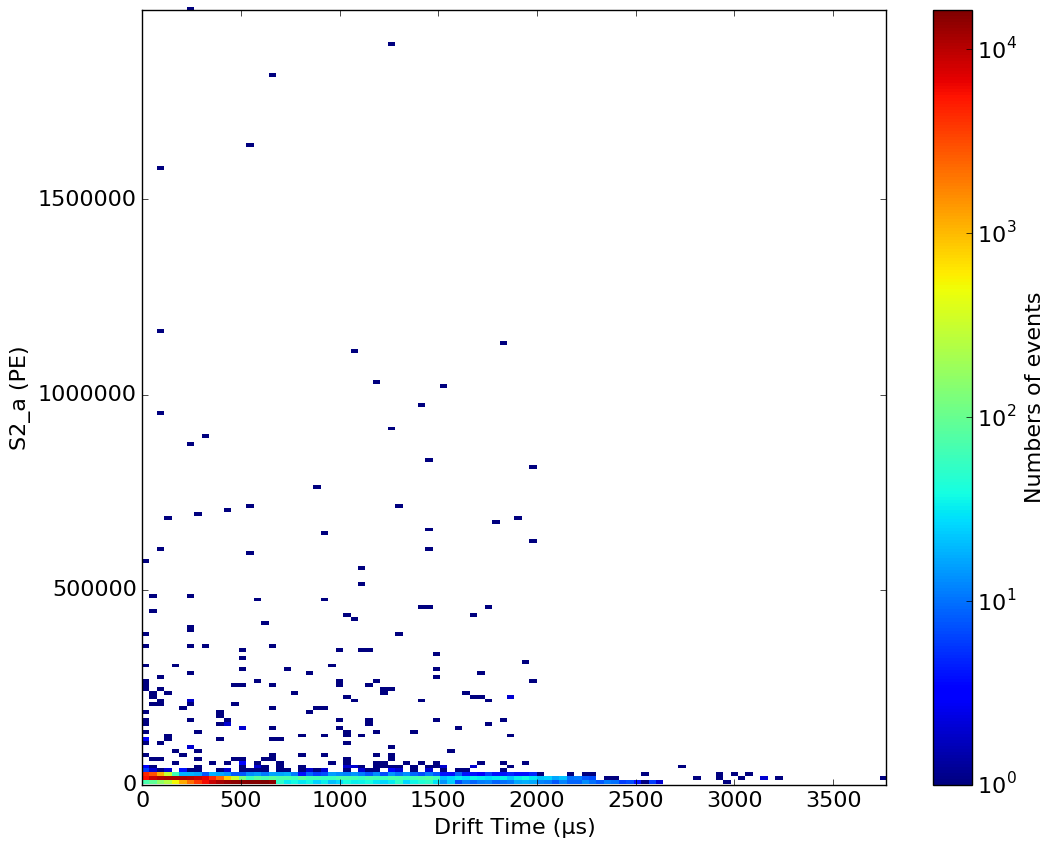

In [320]:
plt.plot()
plt.hist2d(df1['int_a_drift_time']/1000,
            df1['s2_a'], 
            bins=[100,200], norm=matplotlib.colors.LogNorm())
plt.colorbar(label='Numbers of events')
plt.xlabel('Drift Time (µs)')
plt.ylabel('S2_a (PE)')
plt.show()

Still strange hight point 

In [348]:
df1_cut =df1[df1['s2_a']<50000]
df2_cut =df2[df2['s2_a']<50000]

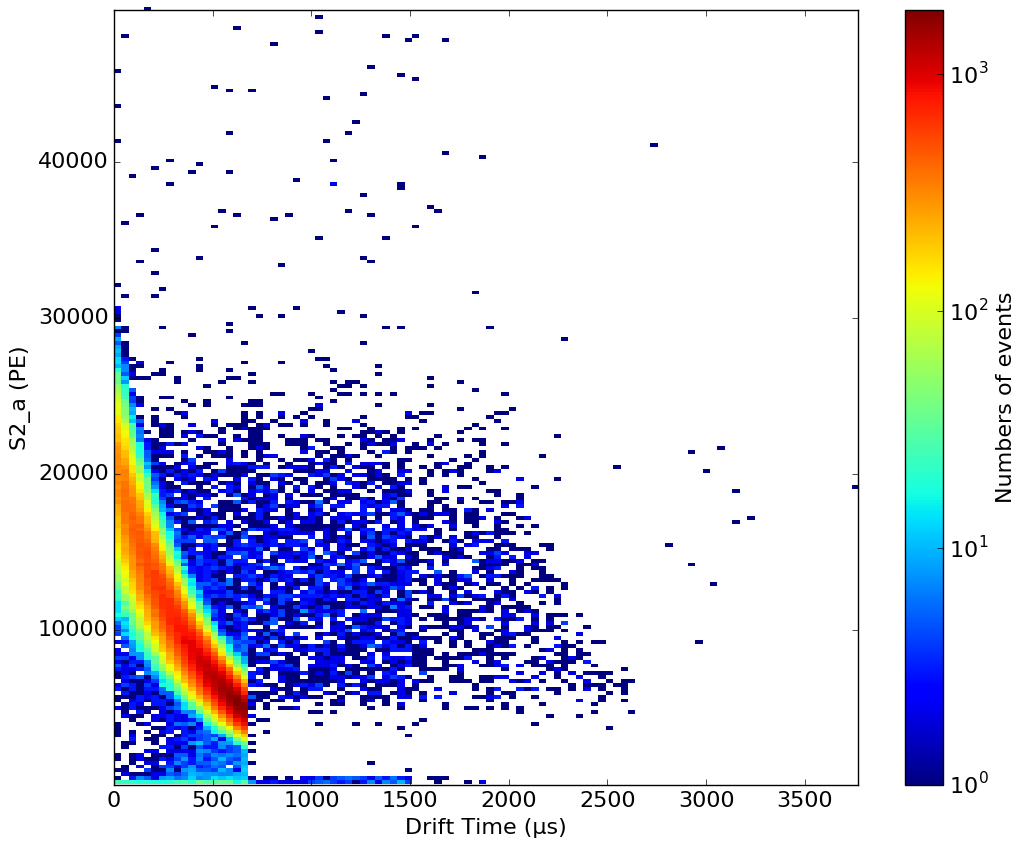

In [349]:
plt.plot()
plt.hist2d(df1_cut['int_a_drift_time']/1000,
            df1_cut['s2_a'], 
            bins=[100,200], norm=matplotlib.colors.LogNorm())
plt.colorbar(label='Numbers of events')
plt.xlabel('Drift Time (µs)')
plt.ylabel('S2_a (PE)')
plt.show()

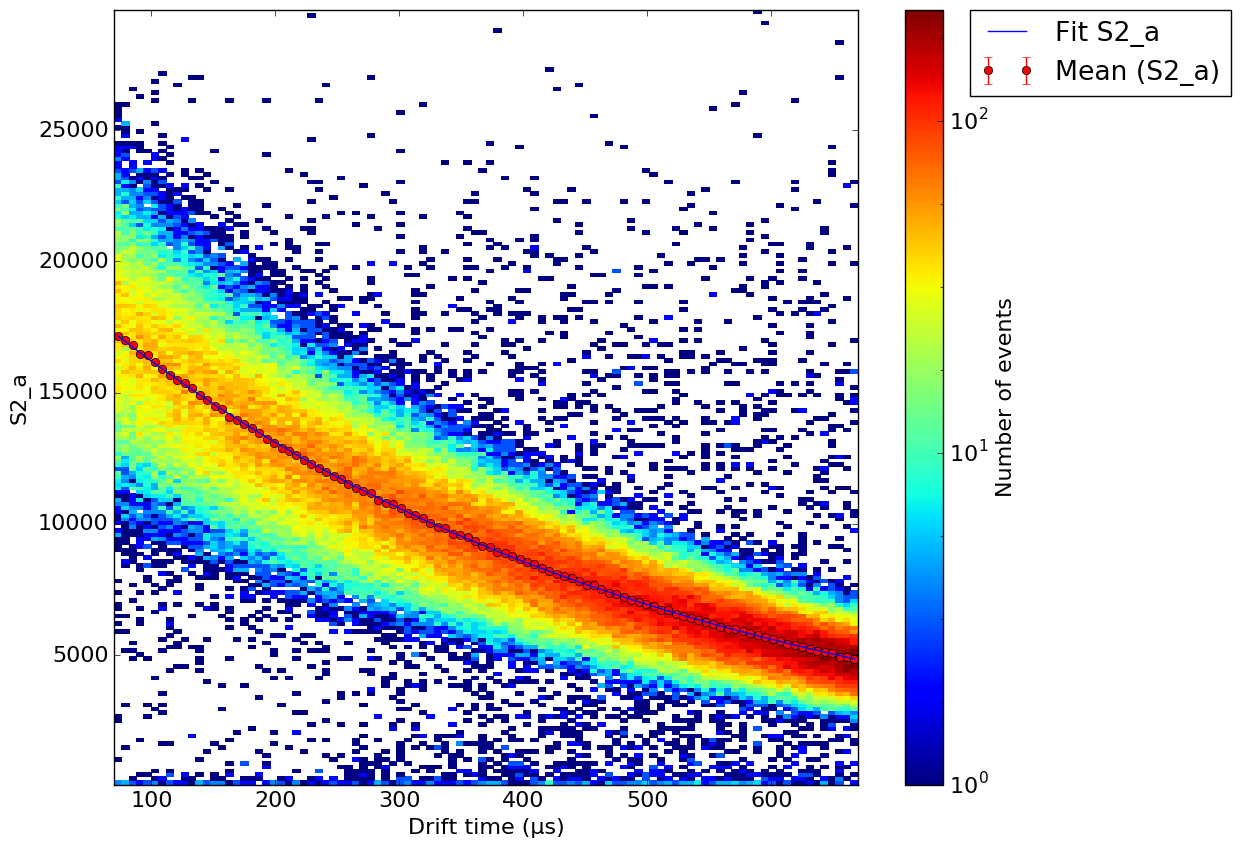

residus = 28.7955354548
El = 470.579128008 +- 0.574621162509


In [354]:
# Error bar : standard deviation / sqrt(N)

drift_time= df1_cut[(df1_cut['int_a_drift_time']>70000)& (df1_cut['int_a_drift_time']<670000)&(df1_cut['s2_a']<30000)]['int_a_drift_time']/1000
s2_a= df1_cut[(df1_cut['int_a_drift_time']>70000)& (df1_cut['int_a_drift_time']<670000)&(df1_cut['s2_a']<30000)]['s2_a']

h = Histdd(drift_time, s2_a, bins =(100,200), #Mean calculate on each bins
           axis_names=['drift_time', 's2_a'])

dt = h.bin_centers('drift_time')
ms2_a = h.average('s2_a').histogram
std_error_s2_a = (h.std(axis='s2_a') / np.sqrt(h.sum('s2_a'))).histogram # std : Compute the standard deviation along the specified axis
                                                                         # h.sum : Compute the number of event in each bins in the specidied axis   
h.plot(log_scale=True, cblabel='Number of events')
plt.errorbar(dt, ms2_a, yerr=std_error_s2_a,
             marker='o', linestyle='', color='red',
             label='Mean (S2_a)')
plt.xlabel('Drift time (µs)')
plt.ylabel('S2_a (pe)')
# plt.ylim(8,10)
# plt.xlim(100,650)
plt.legend()

def exp(x,a,b):
    return a*np.exp(-x/b)

# Initial Guess
p0_s2= (21300,455)

popt_s2, pcov_s2 = curve_fit(exp, dt, ms2_a, p0_s2)


plt.plot(dt, exp(dt,popt_s2[0], popt_s2[1]) , color='blue', label="Fit S2_a")

plt.xlabel('Drift time (µs)')
plt.ylabel('S2_a')
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
plt.show()

res_S2= ms2_a-(exp(dt,popt_s2[0],popt_s2[1]))
print('residus =', res_S2.sum())
error_S2= np.sqrt(np.diag(pcov_s2)) 

error_EL= error_S2[1]
print('El =', popt_s2[1], '+-', error_EL)


# With FV cut

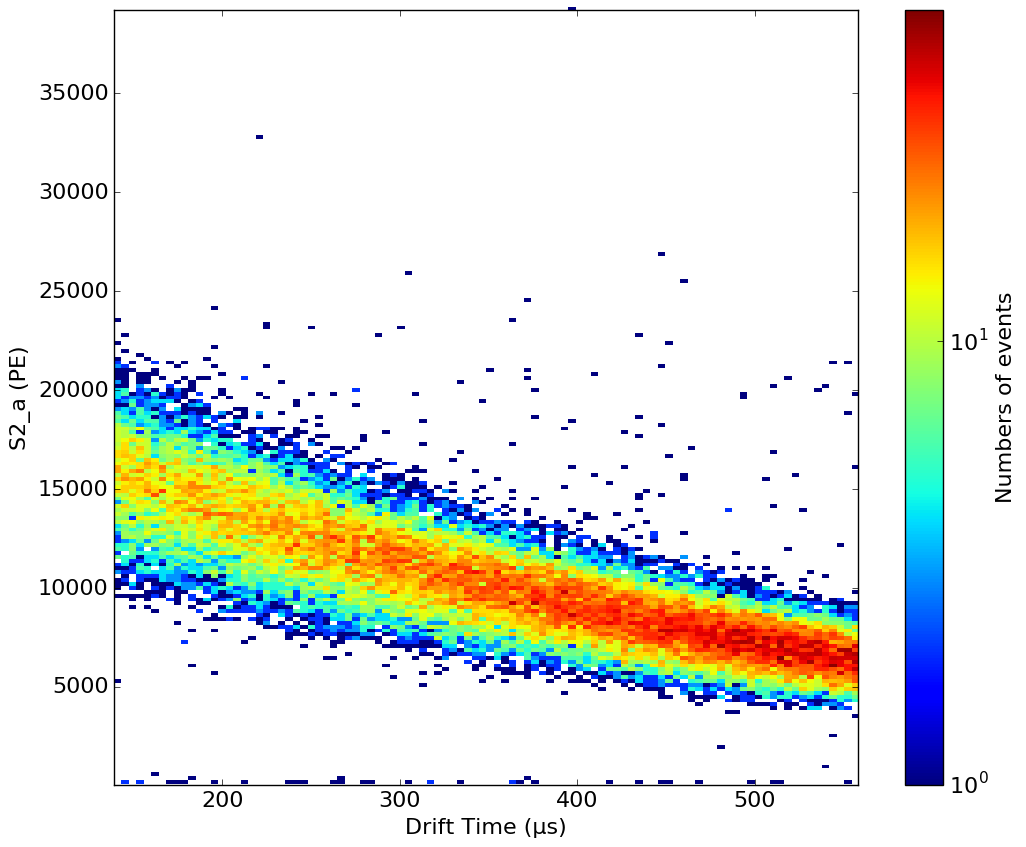

In [355]:
plt.plot()
plt.hist2d(df2_cut['int_a_drift_time']/1000,
            df2_cut['s2_a'], 
            bins=[100,200], norm=matplotlib.colors.LogNorm())
plt.colorbar(label='Numbers of events')
plt.xlabel('Drift Time (µs)')
plt.ylabel('S2_a (PE)')
plt.show()

### Plot between 70 µs and 670 µs 

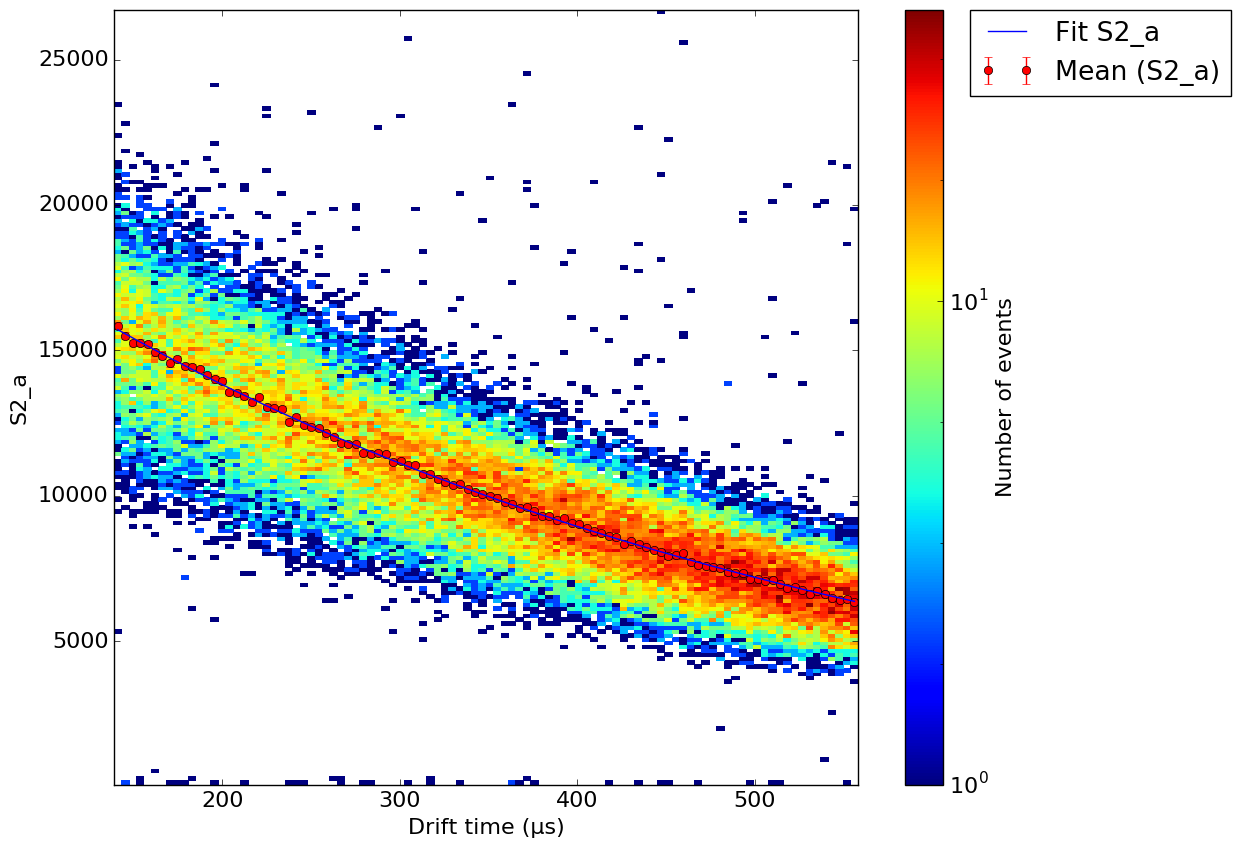

residus = -36.9648735436
Electron Life time=  459.799257452 +- 1.38767672194 µs


In [358]:
# Error bar : standard deviation / sqrt(N)

drift_time= df2_cut[(df2_cut['int_a_drift_time']>70000)& (df2_cut['int_a_drift_time']<670000)&(df2_cut['s2_a']<30000)]['int_a_drift_time']/1000
s2_a= df2_cut[(df2_cut['int_a_drift_time']>70000)& (df2_cut['int_a_drift_time']<670000)&(df2_cut['s2_a']<30000)]['s2_a']

h = Histdd(drift_time, s2_a, bins =(100,200), #Mean calculate on each bins
           axis_names=['drift_time', 's2_a'])

dt = h.bin_centers('drift_time')
ms2_a = h.average('s2_a').histogram
std_error_s2_a = (h.std(axis='s2_a') / np.sqrt(h.sum('s2_a'))).histogram # std : Compute the standard deviation along the specified axis
                                                                         # h.sum : Compute the number of event in each bins in the specidied axis   
h.plot(log_scale=True, cblabel='Number of events')
plt.errorbar(dt, ms2_a, yerr=std_error_s2_a,
             marker='o', linestyle='', color='red',
             label='Mean (S2_a)')
plt.xlabel('Drift time (µs)')
plt.ylabel('S2_a (pe)')
# plt.ylim(8,10)
# plt.xlim(100,650)
plt.legend()

def exp(x,a,b):
    return a*np.exp(-x/b)

# Initial Guess
p0_s2= (21300,455)

popt_s2, pcov_s2 = curve_fit(exp, dt, ms2_a, p0_s2)


plt.plot(dt, exp(dt,popt_s2[0], popt_s2[1]) , color='blue', label="Fit S2_a")

plt.xlabel('Drift time (µs)')
plt.ylabel('S2_a')
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
plt.show()
res_S2= ms2_a-(exp(dt,popt_s2[0],popt_s2[1]))
print('residus =', res_S2.sum())
error_S2= np.sqrt(np.diag(pcov_s2)) 

error_EL= error_S2[1]
print("Electron Life time= ", popt_s2[1] ,'+-',error_EL, 'µs')

# Charge Yield

In [327]:
df2['cs2_b'] =df2['s2_b'] * df2['int_b_s2_area_correction']

/project/lgrandi/anaconda3/envs/pax_v6.5.0/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


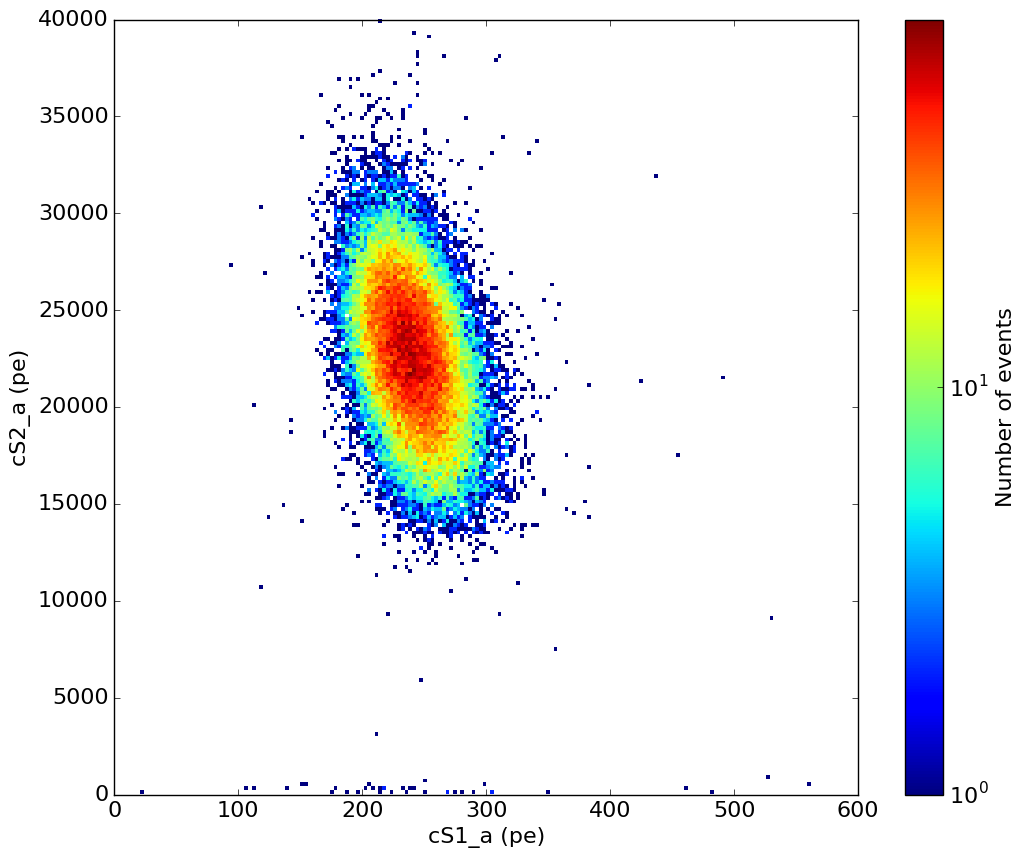

In [328]:
plt.plot()
plt.hist2d(df2['cs1_a'],
            df2['cs2_a'], 
            range=[[0,600],[0,40000]],
            bins=[200,200], norm=matplotlib.colors.LogNorm())


plt.xlabel('cS1_a (pe)')
plt.ylabel('cS2_a (pe)')


plt.colorbar(label='Number of events')

plt.show()

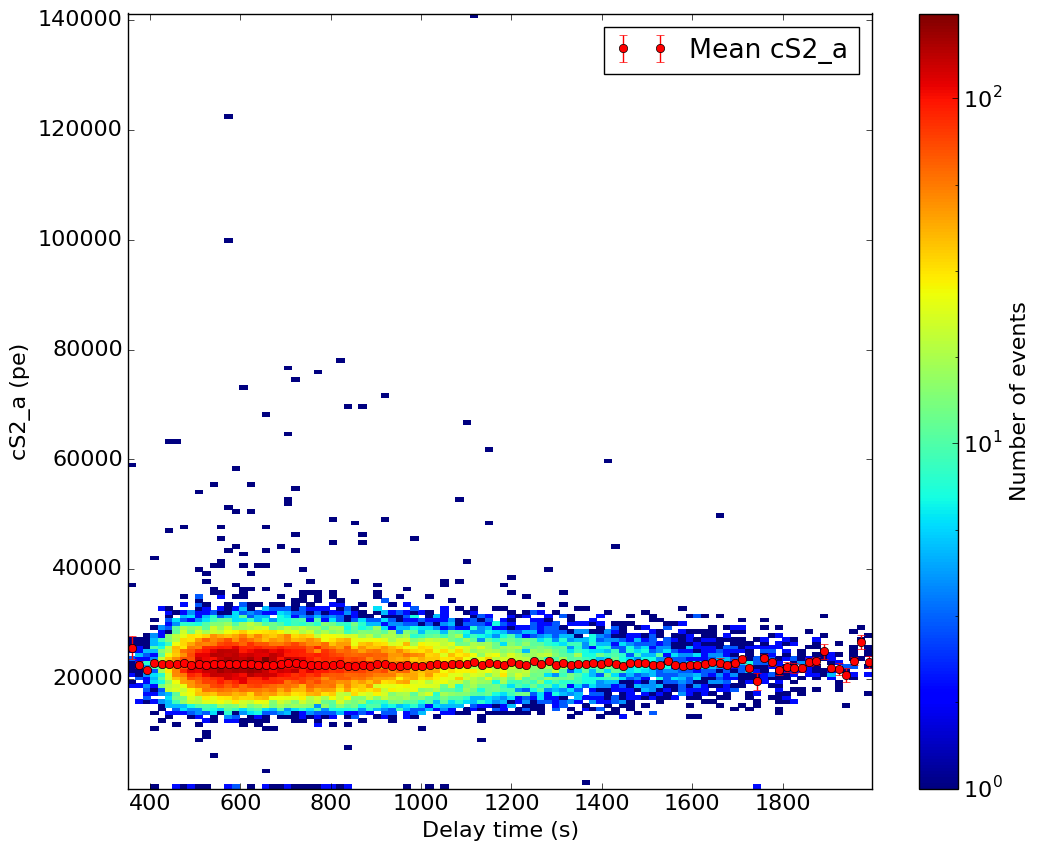

In [329]:
delay_time=df2[(df2['cs2_a']<150000)]['s1_dt_center_time']
cs2_a=df2[(df2['cs2_a']<150000)]['cs2_a']

h = Histdd(delay_time, cs2_a, bins=(100, 200), #Mean calculate on each bins
           axis_names=['delay_time', 'cs2_a'])

t = h.bin_centers('delay_time') # t = delay time (bin) 
ms2_a= h.average('cs2_a').histogram # ms1 = mean value of s1
std_error= (h.std(axis='cs2_a') / np.sqrt(h.sum('cs2_a'))).histogram # std : Compute the standard deviation along the specified axis

h.plot(log_scale=True, cblabel='Number of events')
plt.errorbar(t, ms2_a, yerr=std_error,
             marker='o', linestyle='', color='red',
             label='Mean cS2_a')
plt.xlabel('Delay time (s)')
plt.ylabel('cS2_a (pe)')

plt.legend()
plt.show()

In [94]:
print('Charge yield =', popt_CY[1], '+-', np.sqrt(np.diag(pcov_CY))[1])

Charge yield = 535.333007458 +- 2.88096432378
